In [1]:
from datetime import date
import os
import zipfile
from google.colab import drive #Mount Google Drive
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd # many functions and methodsexpedite the data analysis process
import numpy as np # standard trigonometric functions, functions for arithmetic operations, handling complex numbers, etc
import seaborn as sns # used for data visualization and exploratory data analysis
import matplotlib.pyplot as plt # Matplotlib module which provides a MATLAB-like interface
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range
from statsmodels.tsa.arima_model import ARMA #Advanced Time Series Analysis with ARMA
from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller unit root test
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf #Plot the autocorrelation function
from statsmodels.tsa.stattools import kpss #statistical test to check for stationarity of a series around a deterministic trend
from statsmodels.tsa.seasonal import seasonal_decompose #Decompose Time Series Data into Trend and Seasonality

#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM #LSTM (Long Short-Term Memory) primarily solves the vanishing gradient problem in backpropagation
from keras.layers import Dropout

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/traffic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/traffic')

In [4]:
dataset = pd.read_csv('/tmp/traffic/covid_impact_on_airport_traffic.csv')
dataset = dataset.drop(columns = ['AggregationMethod','Version','Centroid','ISO_3166_2','Geography'])

In [5]:
dataset.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               7247 non-null   object
 1   AirportName        7247 non-null   object
 2   PercentOfBaseline  7247 non-null   int64 
 3   City               7247 non-null   object
 4   State              7247 non-null   object
 5   Country            7247 non-null   object
dtypes: int64(1), object(5)
memory usage: 339.8+ KB


In [7]:
dataset.shape

(7247, 6)

In [8]:
dataset.columns

Index(['Date', 'AirportName', 'PercentOfBaseline', 'City', 'State', 'Country'], dtype='object')

In [9]:
dataset.duplicated().sum()

0

In [10]:
dataset.isnull().sum()

Date                 0
AirportName          0
PercentOfBaseline    0
City                 0
State                0
Country              0
dtype: int64

In [11]:
dataset["Country"].unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

In [12]:
dataset["City"].unique()

array(['Sydney', 'Santiago', 'Calgary', 'Leduc County', 'Richmond',
       'Winnipeg', 'Halifax', 'Mississauga', 'Hamilton', 'Mirabel',
       'Dorval', 'Los Angeles', 'South San Francisco', 'Denver',
       'Miami Springs', 'College Park', 'Urban Honolulu', 'Chicago',
       'Boston', 'Romulus', 'Charlotte', 'Newark', 'Paradise', 'New York',
       'Grapevine', 'Floris', 'SeaTac'], dtype=object)

In [13]:
dataset.groupby("AirportName")["Country"].count()

AirportName
Boston Logan International                   261
Calgary International                        261
Charlotte Douglas International              261
Chicago OHare International                  261
Dallas/Fort Worth International              262
Daniel K. Inouye International               261
Denver International                         261
Detroit Metropolitan Wayne County            261
Edmonton International                       236
Halifax International                        252
Hamilton International                       260
Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Kingsford Smith                              257
LaGuardia                                    261
Los Angeles International                    262
McCarran International                       261
Miami International                          261
Montreal Mirabel                             257
Montreal Trudeau                             262
Newark L

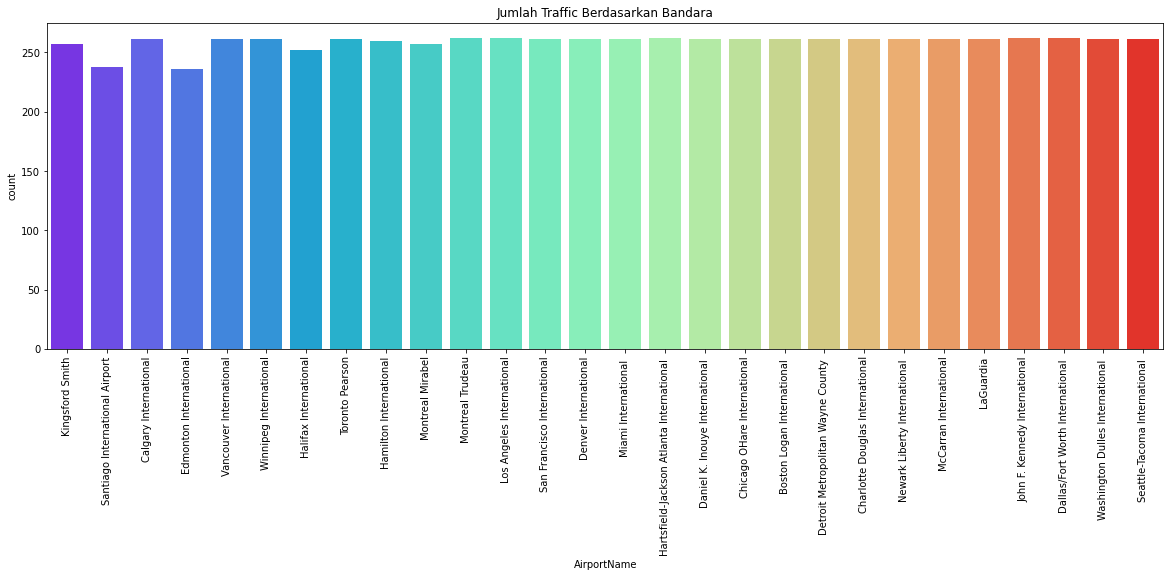

In [14]:
plt.figure(figsize=(20,6))
figure1 = sns.countplot(x = 'AirportName', data = dataset , palette='rainbow')
figure1.set_xticklabels(figure1.get_xticklabels(), rotation=90)
figure1.set_title("Jumlah Traffic Berdasarkan Bandara")
plt.show();

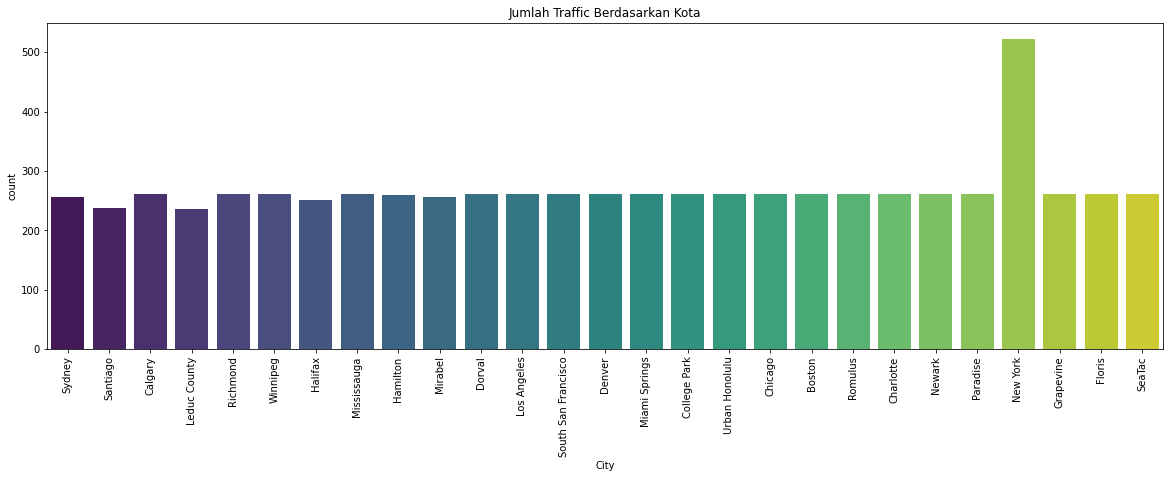

In [15]:
plt.figure(figsize=(20,6))
figure2 = sns.countplot(x = 'City', data = dataset , palette='viridis')
figure2.set_xticklabels(figure2.get_xticklabels(), rotation=90)
figure2.set_title("Jumlah Traffic Berdasarkan Kota")
plt.show();

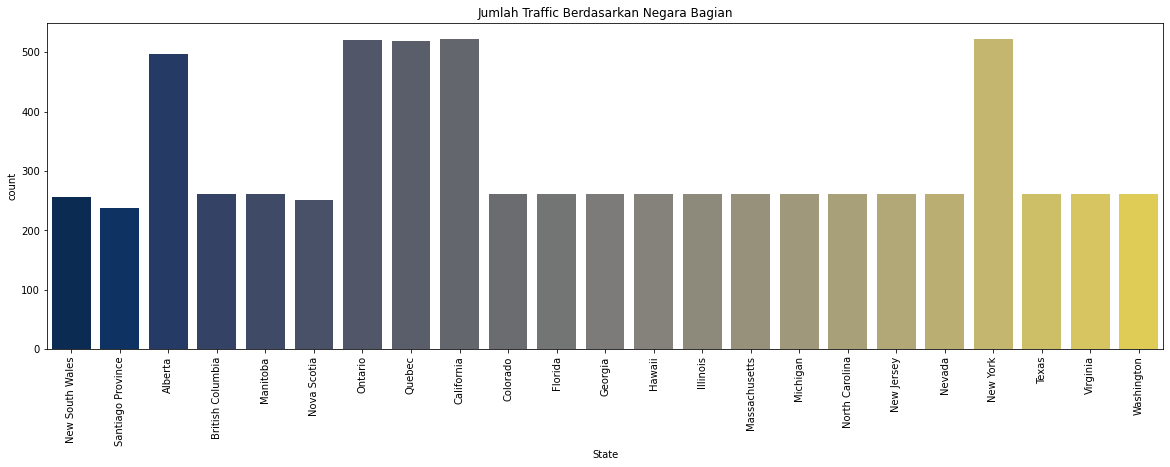

In [16]:
plt.figure(figsize=(20,6))
figure3 = sns.countplot(x = 'State', data = dataset , palette='cividis')
figure3.set_xticklabels(figure3.get_xticklabels(), rotation=90)
figure3.set_title("Jumlah Traffic Berdasarkan Negara Bagian")
plt.show();

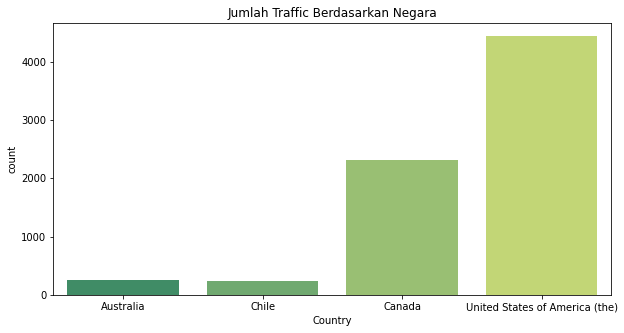

In [17]:
plt.figure(figsize=(10,5))
figure4 = sns.countplot(x = 'Country', data = dataset , palette='summer')
figure4.set_xticklabels(figure4.get_xticklabels())
figure4.set_title("Jumlah Traffic Berdasarkan Negara")
plt.show();

#Dataset USA

In [18]:
dataset_US = dataset[dataset['Country']=='United States of America (the)']
dataset_US.shape

(4441, 6)

In [19]:
dataset_US.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
2806,2020-06-22,Los Angeles International,63,Los Angeles,California,United States of America (the)
2807,2020-09-27,Los Angeles International,68,Los Angeles,California,United States of America (the)
2808,2020-03-22,Los Angeles International,76,Los Angeles,California,United States of America (the)
2809,2020-03-23,Los Angeles International,73,Los Angeles,California,United States of America (the)
2810,2020-05-19,Los Angeles International,67,Los Angeles,California,United States of America (the)


In [20]:
dataset_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 2806 to 7246
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               4441 non-null   object
 1   AirportName        4441 non-null   object
 2   PercentOfBaseline  4441 non-null   int64 
 3   City               4441 non-null   object
 4   State              4441 non-null   object
 5   Country            4441 non-null   object
dtypes: int64(1), object(5)
memory usage: 242.9+ KB


In [21]:
dataset_US.nunique()

Date                 262
AirportName           17
PercentOfBaseline     92
City                  16
State                 15
Country                1
dtype: int64

In [22]:
dataset_US = dataset_US.sort_values(by="Date")

In [23]:
dataset_US.set_index('Date',inplace=True)

In [24]:
dataset_US.head()

,AirportName,PercentOfBaseline,City,State,Country
Date,,,,,
2020-03-16,John F. Kennedy International,70,New York,New York,United States of America (the)
2020-03-16,Miami International,98,Miami Springs,Florida,United States of America (the)
2020-03-16,Boston Logan International,97,Boston,Massachusetts,United States of America (the)
2020-03-16,Detroit Metropolitan Wayne County,73,Romulus,Michigan,United States of America (the)
2020-03-16,Denver International,94,Denver,Colorado,United States of America (the)


In [25]:
df_USA = pd.DataFrame(dataset_US.groupby('Date',as_index=True)['PercentOfBaseline'].mean())

In [26]:
df_USA.shape

(262, 1)

In [27]:
df_USA.head()

,PercentOfBaseline
Date,
2020-03-16,88.058824
2020-03-17,87.823529
2020-03-18,81.705882
2020-03-19,73.764706
2020-03-20,73.058824


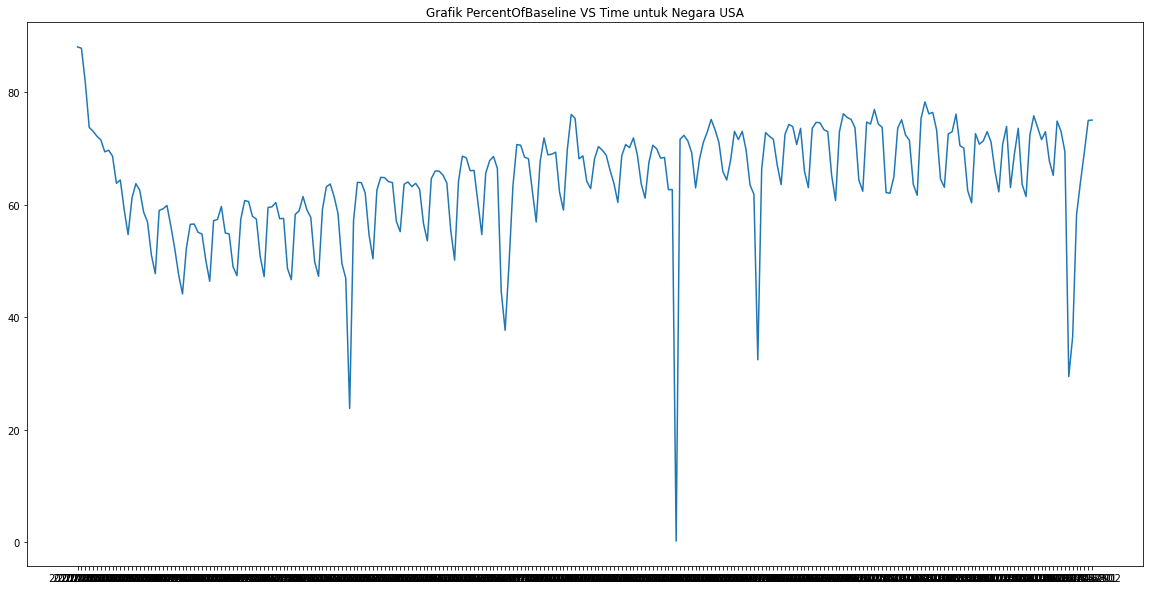

In [28]:
plt.figure(figsize=(20,10))
plt.plot(df_USA)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara USA")
plt.show()

In [29]:
print('Results of Dickey-Fuller Test:')
test_USA = adfuller(df_USA['PercentOfBaseline'], autolag='AIC')
output_USA = pd.Series(test_USA[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_USA[4].items():
    output_USA['Critical Value (%s)'%key] = value
print(output_USA)

Results of Dickey-Fuller Test:
Test Statistic                  -2.920672
p-value                          0.042996
#Lags Used                       6.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [30]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest = kpss(df_USA['PercentOfBaseline'].dropna(), regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            0.84213
p-value                   0.01000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


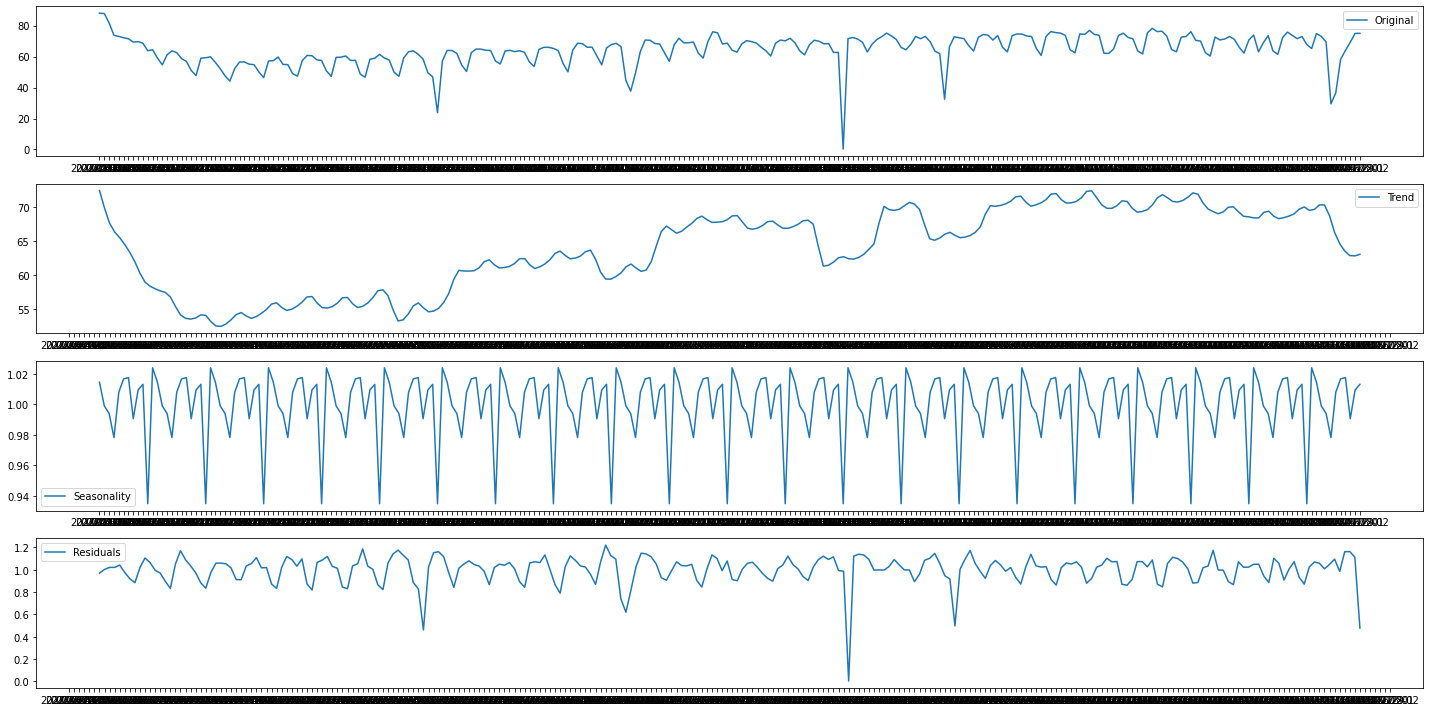

In [31]:
decomposition = seasonal_decompose(df_USA.dropna(), model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_USA['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

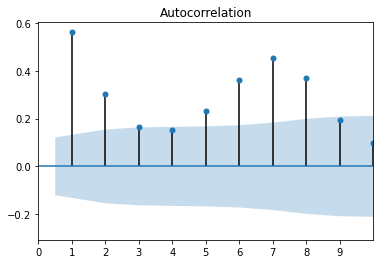

In [32]:
plot_acf(df_USA['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

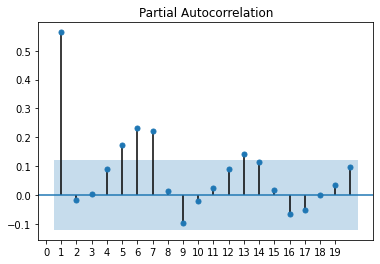

In [33]:
plot_pacf(df_USA['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

In [34]:
# Create Training and Test
size = int(len(df_USA['PercentOfBaseline'])*0.8)
train = df_USA['PercentOfBaseline'].iloc[:size]
test = df_USA['PercentOfBaseline'].iloc[size:]
# Build Model
model = ARMA(train, order=(1,2))  
fitted = model.fit() 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -733.953
Method:                       css-mle   S.D. of innovations              8.092
Date:                Tue, 05 Jul 2022   AIC                           1477.906
Time:                        02:33:09   BIC                           1494.617
Sample:                    03-16-2020   HQIC                          1484.662
                         - 10-10-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      65.3294      3.677     17.765      0.000      58.122      72.537
ar.L1.PercentOfBaseline     0.9723      0.023     42.441      0.000       0.927       1.017


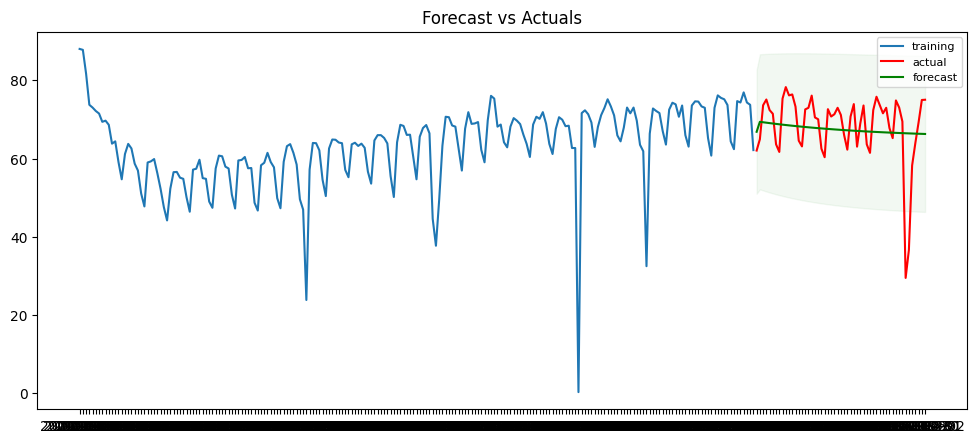

In [35]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual',color='r')
plt.plot(fc_series, label='forecast',color='g')
plt.fill_between(lower_series.index, lower_series, upper_series,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

In [36]:
training_set1=df_USA['PercentOfBaseline']
training_set1=pd.DataFrame(training_set1)

In [37]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc.fit_transform(training_set1)

In [38]:
# Creating a data structure with 52 timesteps and 1 output
X_train1 = []
y_train1 = []
for i in range(52, 262):
    X_train1.append(training_set_scaled1[i-52:i, 0])
    y_train1.append(training_set_scaled1[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

# Reshaping
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))

In [39]:
print(X_train1.shape)

(210, 52, 1)


In [40]:
# Initialising the RNN
model = Sequential()

In [41]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model.add(LSTM(64, return_sequences = True, input_shape = (X_train1.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2)),
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 52, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 50)            23000     
                                                                 
 dropout_1 (Dropout)         (None, 52, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 52, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 52, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [42]:
# Compiling the RNN
# Code here
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model.fit(X_train1, y_train1, epochs=epoch, batch_size=batch_size)

Epoch 1/100
7/7 [==============================] - 9s 117ms/step - loss: 0.1804
Epoch 2/100
7/7 [==============================] - 1s 116ms/step - loss: 0.0389
Epoch 3/100
7/7 [==============================] - 1s 110ms/step - loss: 0.0250
Epoch 4/100
7/7 [==============================] - 1s 116ms/step - loss: 0.0180
Epoch 5/100
7/7 [==============================] - 1s 122ms/step - loss: 0.0200
Epoch 6/100
7/7 [==============================] - 1s 119ms/step - loss: 0.0171
Epoch 7/100
7/7 [==============================] - 1s 117ms/step - loss: 0.0154
Epoch 8/100
7/7 [==============================] - 1s 120ms/step - loss: 0.0170
Epoch 9/100
7/7 [==============================] - 1s 119ms/step - loss: 0.0151
Epoch 10/100
7/7 [==============================] - 1s 116ms/step - loss: 0.0167
Epoch 11/100
7/7 [==============================] - 1s 112ms/step - loss: 0.0149
Epoch 12/100
7/7 [==============================] - 1s 118ms/step - loss: 0.0157
Epoch 13/100
7/7 [===================

In [44]:
test_set1 = df_USA['PercentOfBaseline']
test_set1=pd.DataFrame(test_set1)

In [45]:
test_set1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1+ KB


In [46]:
# Getting the predicted PercentOfBaseline
dataset_total1 = pd.concat((training_set1['PercentOfBaseline'], test_set1['PercentOfBaseline']), axis = 0)
inputs1 = dataset_total1[len(dataset_total1) - len(test_set1) - 52:].values
inputs1 = inputs1.reshape(-1,1)
inputs1 = sc.transform(inputs1)
X_test1 = []
for i in range(52, 314):
    X_test1.append(inputs1[i-52:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_PercentOfBaseline1 = model.predict(X_test1)
predicted_PercentOfBaseline1 = sc.inverse_transform(predicted_PercentOfBaseline1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [47]:
predicted_PercentOfBaseline1=pd.DataFrame(predicted_PercentOfBaseline1)
predicted_PercentOfBaseline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


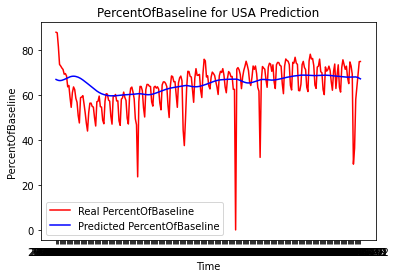

In [48]:
# Visualising the results
plt.plot(df_USA, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline1, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for USA Prediction')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#Choose Dataset CANADA

In [49]:
dataset_CANADA = dataset[dataset['Country']=='Canada']
dataset_CANADA.shape

(2311, 6)

In [50]:
dataset_CANADA.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
495,2020-04-05,Calgary International,65,Calgary,Alberta,Canada
496,2020-09-01,Calgary International,97,Calgary,Alberta,Canada
497,2020-11-15,Calgary International,100,Calgary,Alberta,Canada
498,2020-03-26,Calgary International,91,Calgary,Alberta,Canada
499,2020-04-25,Calgary International,80,Calgary,Alberta,Canada


In [51]:
dataset_CANADA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 495 to 2805
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               2311 non-null   object
 1   AirportName        2311 non-null   object
 2   PercentOfBaseline  2311 non-null   int64 
 3   City               2311 non-null   object
 4   State              2311 non-null   object
 5   Country            2311 non-null   object
dtypes: int64(1), object(5)
memory usage: 126.4+ KB


In [52]:
dataset_CANADA.nunique()

Date                 262
AirportName            9
PercentOfBaseline     95
City                   9
State                  6
Country                1
dtype: int64

In [53]:
dataset_CANADA = dataset_CANADA.sort_values(by="Date")

In [54]:
dataset_CANADA.set_index('Date',inplace=True)

In [55]:
dataset_CANADA.head()

,AirportName,PercentOfBaseline,City,State,Country
Date,,,,,
2020-03-16,Hamilton International,96,Hamilton,Ontario,Canada
2020-03-16,Winnipeg International,100,Winnipeg,Manitoba,Canada
2020-03-16,Halifax International,72,Halifax,Nova Scotia,Canada
2020-03-16,Vancouver International,100,Richmond,British Columbia,Canada
2020-03-16,Calgary International,100,Calgary,Alberta,Canada


In [56]:
df_CANADA = pd.DataFrame(dataset_CANADA.groupby('Date',as_index=True)['PercentOfBaseline'].mean())

In [57]:
df_CANADA.shape

(262, 1)

In [58]:
df_CANADA.head()

,PercentOfBaseline
Date,
2020-03-16,92.333333
2020-03-17,87.888889
2020-03-18,88.000000
2020-03-19,84.777778
2020-03-20,86.666667


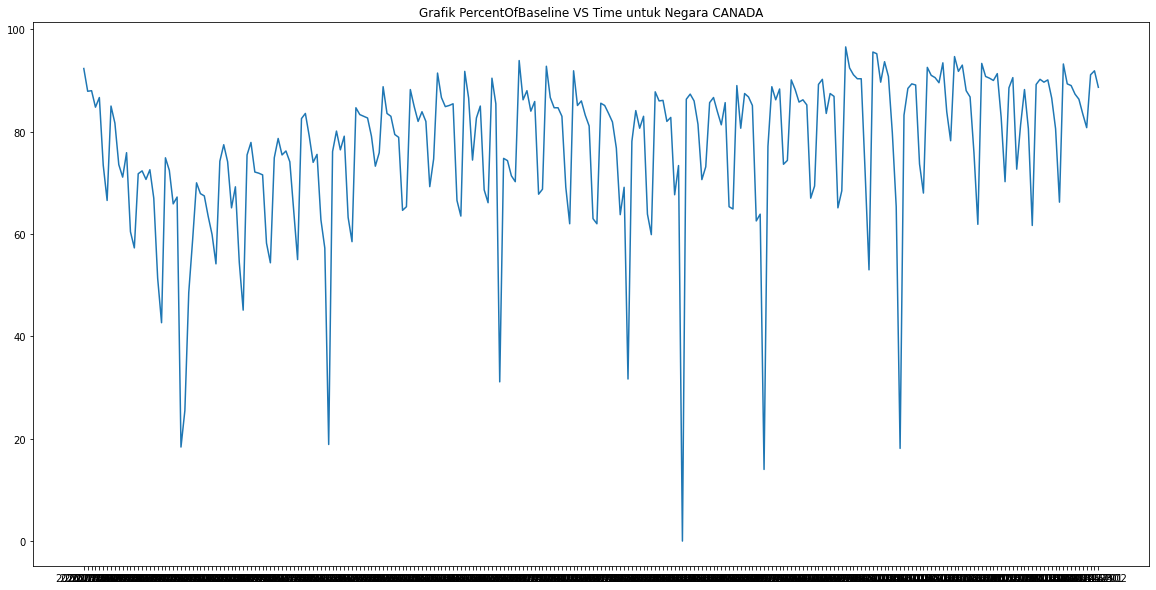

In [59]:
plt.figure(figsize=(20,10))
plt.plot(df_CANADA)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara CANADA")
plt.show()

In [60]:
print('Results of Dickey-Fuller Test:')
test_CANADA = adfuller(df_CANADA['PercentOfBaseline'], autolag='AIC')
output_CANADA = pd.Series(test_CANADA[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_CANADA[4].items():
    output_CANADA['Critical Value (%s)'%key] = value
print(output_CANADA)

Results of Dickey-Fuller Test:
Test Statistic                  -1.724863
p-value                          0.418350
#Lags Used                      13.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [61]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest2 = kpss(df_CANADA['PercentOfBaseline'].dropna(), regression='c')
kpss_output2 = pd.Series(kpsstest2[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output2['Critical Value (%s)'%key] = value
print (kpss_output2)

Results of KPSS Test:
Test Statistic            0.896685
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


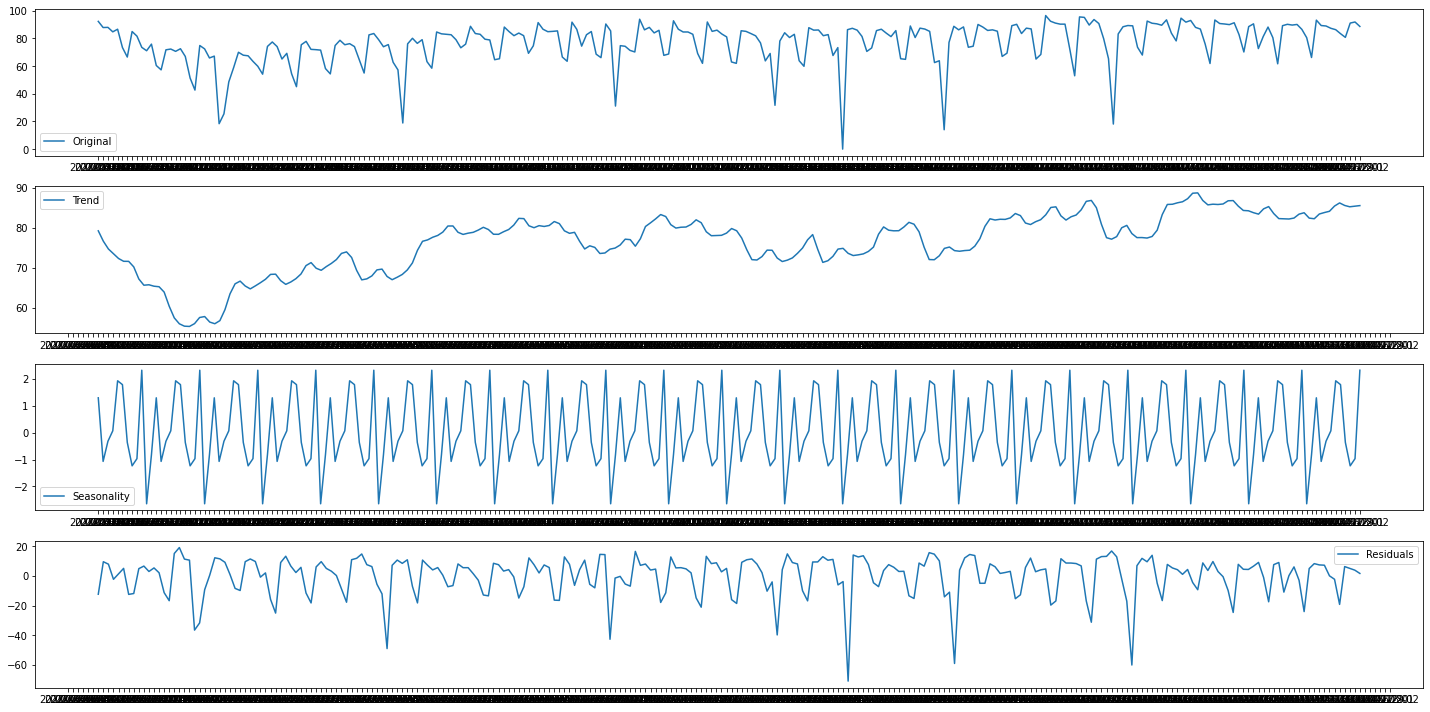

In [62]:
decomposition = seasonal_decompose(df_CANADA.dropna(), model='additive', freq=12)

trend2 = decomposition.trend
seasonal2 = decomposition.seasonal
residual2 = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_CANADA['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

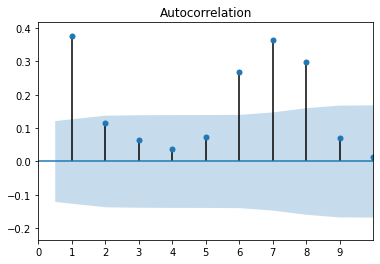

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_CANADA['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

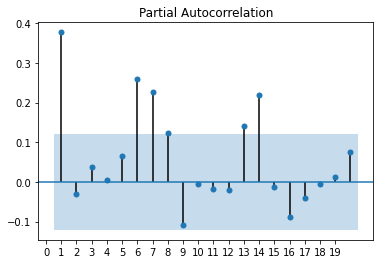

In [64]:
plot_pacf(df_CANADA['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

In [65]:
# Create Training and Test
size2 = int(len(df_CANADA['PercentOfBaseline'])*0.8)
train2 = df_CANADA['PercentOfBaseline'].iloc[:size]
test2 = df_CANADA['PercentOfBaseline'].iloc[size:]
# Build Model
model2 = ARMA(train2, order=(1,2))  
fitted2 = model2.fit() 
print(fitted2.summary())

# Forecast
fc2, se2, conf2 = fitted2.forecast(len(test2), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series2 = pd.Series(fc2, index=test2.index)
lower_series2 = pd.Series(conf2[:, 0], index=test2.index)
upper_series2 = pd.Series(conf2[:, 1], index=test2.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -844.402
Method:                       css-mle   S.D. of innovations             13.742
Date:                Tue, 05 Jul 2022   AIC                           1698.804
Time:                        02:35:06   BIC                           1715.516
Sample:                    03-16-2020   HQIC                          1705.561
                         - 10-10-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      75.8541      2.944     25.763      0.000      70.083      81.625
ar.L1.PercentOfBaseline     0.9632      0.034     28.355      0.000       0.897       1.030


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


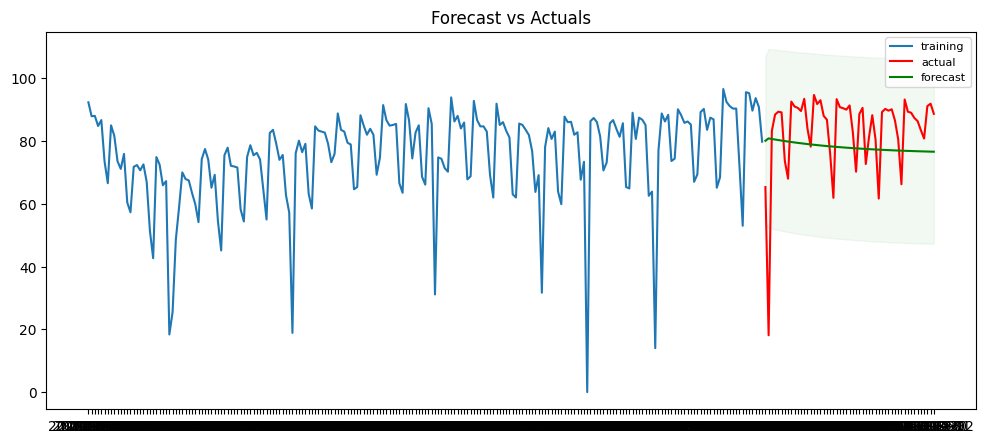

In [66]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train2, label='training')
plt.plot(test2, label='actual',color='r')
plt.plot(fc_series2, label='forecast',color='g')
plt.fill_between(lower_series2.index, lower_series2, upper_series2,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

In [67]:
training_set2=df_CANADA['PercentOfBaseline']
training_set2=pd.DataFrame(training_set2)

In [68]:
# Feature Scaling
sc2 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc2.fit_transform(training_set2)

In [69]:
# Creating a data structure with 52 timesteps and 1 output
X_train2 = []
y_train2 = []
for i in range(52, 262):
    X_train2.append(training_set_scaled2[i-52:i, 0])
    y_train2.append(training_set_scaled2[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

# Reshaping
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))

In [70]:
print(X_train2.shape)

(210, 52, 1)


In [71]:
# Initialising the RNN
model = Sequential()

In [72]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model.add(LSTM(64, return_sequences = True, input_shape = (X_train2.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2)),
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 52, 64)            16896     
                                                                 
 dropout_4 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 52, 50)            23000     
                                                                 
 dropout_5 (Dropout)         (None, 52, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 52, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 52, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [73]:
# Compiling the RNN
# Code here
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model.fit(X_train2, y_train2, epochs=epoch, batch_size=batch_size)

Epoch 1/100
7/7 [==============================] - 8s 109ms/step - loss: 0.2799
Epoch 2/100
7/7 [==============================] - 1s 112ms/step - loss: 0.0686
Epoch 3/100
7/7 [==============================] - 1s 118ms/step - loss: 0.0529
Epoch 4/100
7/7 [==============================] - 1s 123ms/step - loss: 0.0347
Epoch 5/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0406
Epoch 6/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0367
Epoch 7/100
7/7 [==============================] - 1s 121ms/step - loss: 0.0313
Epoch 8/100
7/7 [==============================] - 1s 125ms/step - loss: 0.0335
Epoch 9/100
7/7 [==============================] - 1s 121ms/step - loss: 0.0323
Epoch 10/100
7/7 [==============================] - 1s 123ms/step - loss: 0.0294
Epoch 11/100
7/7 [==============================] - 1s 127ms/step - loss: 0.0294
Epoch 12/100
7/7 [==============================] - 1s 122ms/step - loss: 0.0288
Epoch 13/100
7/7 [===================

In [75]:
test_set2 = df_CANADA['PercentOfBaseline']
test_set2=pd.DataFrame(test_set2)

In [76]:
test_set2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1+ KB


In [77]:
# Getting the predicted PercentOfBaseline
dataset_total2 = pd.concat((training_set2['PercentOfBaseline'], test_set2['PercentOfBaseline']), axis = 0)
inputs2 = dataset_total2[len(dataset_total2) - len(test_set2) - 52:].values
inputs2 = inputs2.reshape(-1,1)
inputs2 = sc.transform(inputs2)
X_test2 = []
for i in range(52, 314):
    X_test2.append(inputs2[i-52:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
predicted_PercentOfBaseline2 = model.predict(X_test2)
predicted_PercentOfBaseline2 = sc.inverse_transform(predicted_PercentOfBaseline2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [78]:
predicted_PercentOfBaseline2=pd.DataFrame(predicted_PercentOfBaseline2)
predicted_PercentOfBaseline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


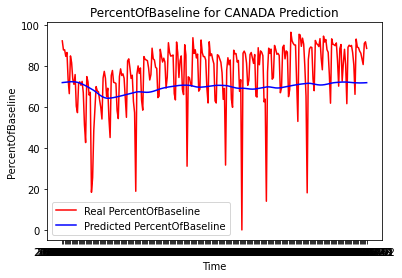

In [79]:
# Visualising the results
plt.plot(df_CANADA, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline2, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for CANADA Prediction')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#DATASET AUSTRALIA

In [80]:
dataset_Australia = dataset[dataset['Country']=='Australia']
dataset_Australia.shape

(257, 6)

In [81]:
dataset_Australia.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia


In [82]:
dataset_Australia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               257 non-null    object
 1   AirportName        257 non-null    object
 2   PercentOfBaseline  257 non-null    int64 
 3   City               257 non-null    object
 4   State              257 non-null    object
 5   Country            257 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.1+ KB


In [83]:
dataset_Australia.nunique()

Date                 257
AirportName            1
PercentOfBaseline     65
City                   1
State                  1
Country                1
dtype: int64

In [84]:
dataset_Australia = dataset_Australia.sort_values(by="Date")

In [85]:
dataset_Australia.set_index('Date',inplace=True)

In [86]:
dataset_Australia.head()

,AirportName,PercentOfBaseline,City,State,Country
Date,,,,,
2020-03-16,Kingsford Smith,92,Sydney,New South Wales,Australia
2020-03-17,Kingsford Smith,90,Sydney,New South Wales,Australia
2020-03-18,Kingsford Smith,97,Sydney,New South Wales,Australia
2020-03-19,Kingsford Smith,89,Sydney,New South Wales,Australia
2020-03-20,Kingsford Smith,85,Sydney,New South Wales,Australia


In [87]:
df_Australia = pd.DataFrame(dataset_Australia.groupby('Date',as_index=True)['PercentOfBaseline'].mean())

In [88]:
df_Australia.shape

(257, 1)

In [89]:
df_Australia.head()

,PercentOfBaseline
Date,
2020-03-16,92.0
2020-03-17,90.0
2020-03-18,97.0
2020-03-19,89.0
2020-03-20,85.0


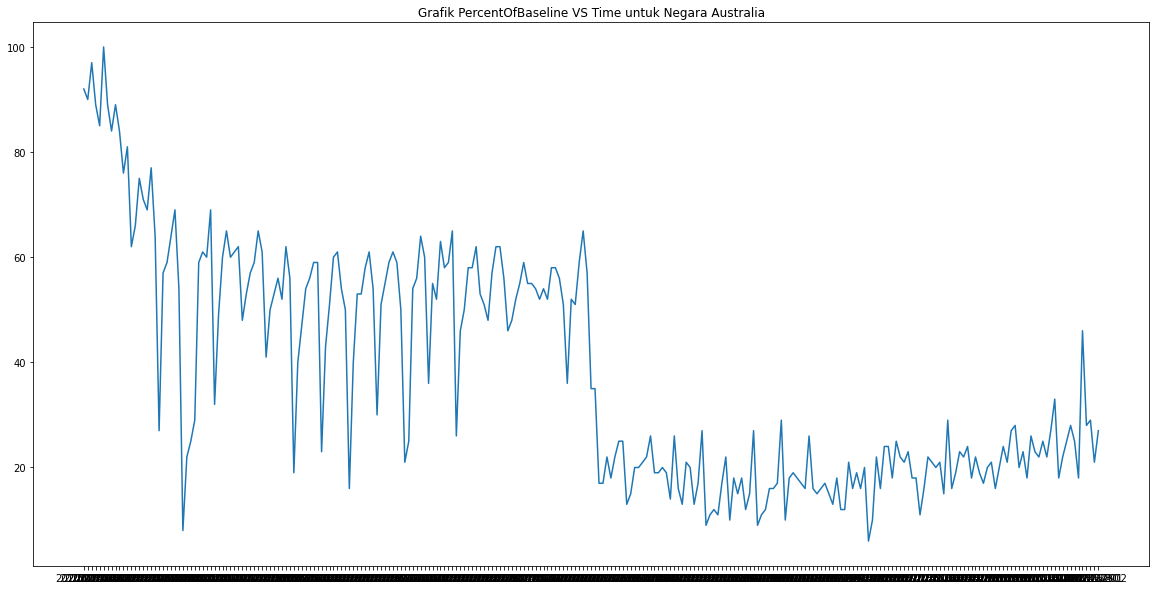

In [90]:
plt.figure(figsize=(20,10))
plt.plot(df_Australia)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara Australia")
plt.show()

In [91]:
print('Results of Dickey-Fuller Test:')
test_Australia = adfuller(df_Australia['PercentOfBaseline'], autolag='AIC')
output_Australia = pd.Series(test_Australia[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_Australia[4].items():
    output_Australia['Critical Value (%s)'%key] = value
print(output_Australia)

Results of Dickey-Fuller Test:
Test Statistic                  -2.770638
p-value                          0.062592
#Lags Used                       8.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [92]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest3 = kpss(df_Australia['PercentOfBaseline'].dropna(), regression='c')
kpss_output3 = pd.Series(kpsstest3[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest3[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output3)

Results of KPSS Test:
Test Statistic     1.287648
p-value            0.010000
Lags Used         16.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


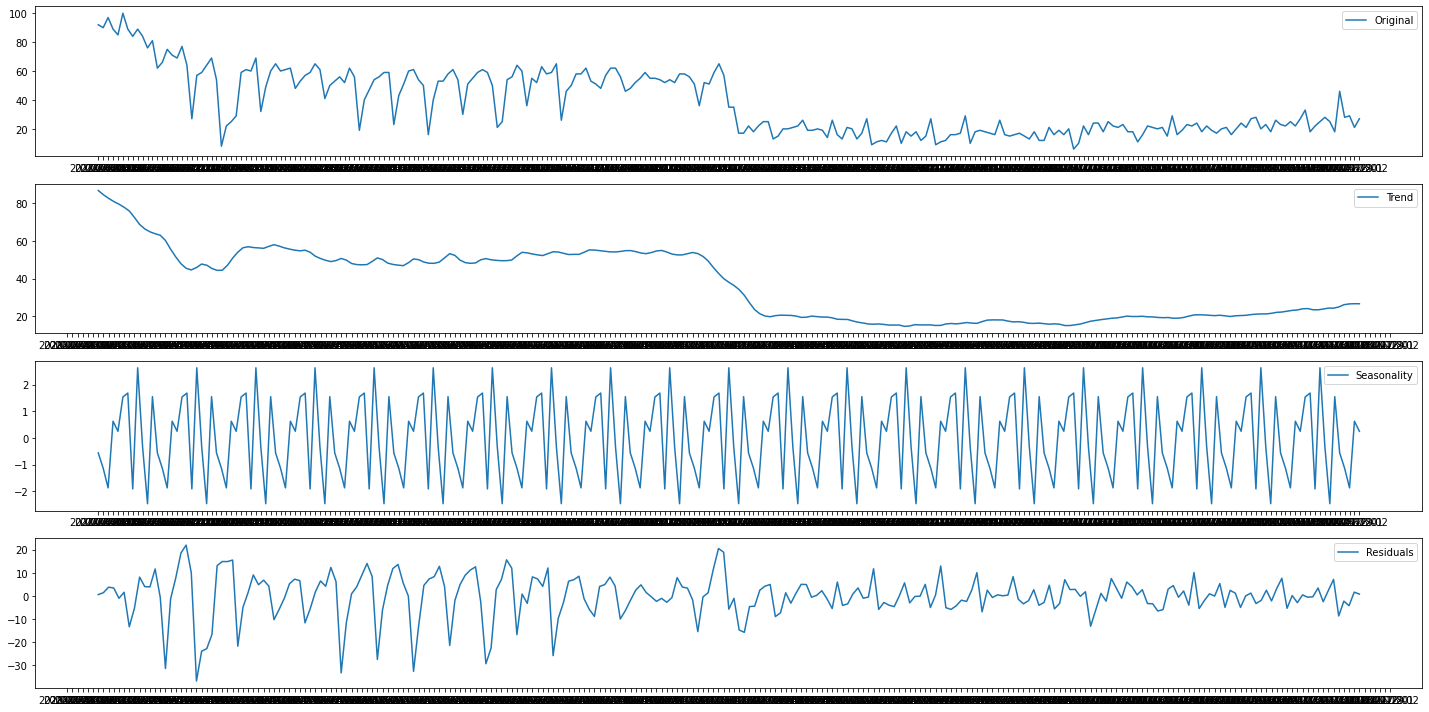

In [93]:
decomposition = seasonal_decompose(df_Australia.dropna(), model='additive', freq=12)

trend3 = decomposition.trend
seasonal3 = decomposition.seasonal
residual3 = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_Australia['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

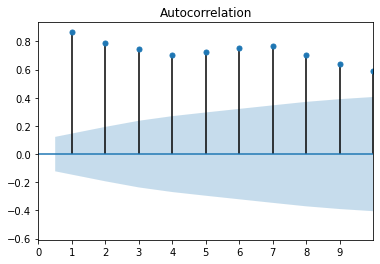

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_Australia['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

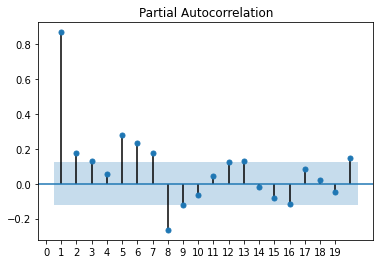

In [95]:
plot_pacf(df_Australia['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

In [96]:
# Create Training and Test
size3 = int(len(df_Australia['PercentOfBaseline'])*0.8)
train3 = df_Australia['PercentOfBaseline'].iloc[:size]
test3 = df_Australia['PercentOfBaseline'].iloc[size:]
# Build Model
model3 = ARMA(train3, order=(1,2))  
fitted3 = model3.fit() 
print(fitted3.summary())

# Forecast
fc3, se3, conf3 = fitted3.forecast(len(test3), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series3 = pd.Series(fc3, index=test3.index)
lower_series3 = pd.Series(conf3[:, 0], index=test3.index)
upper_series3 = pd.Series(conf3[:, 1], index=test3.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -786.247
Method:                       css-mle   S.D. of innovations             10.349
Date:                Tue, 05 Jul 2022   AIC                           1582.493
Time:                        02:38:01   BIC                           1599.205
Sample:                             0   HQIC                          1589.250
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      49.5238     21.653      2.287      0.023       7.085      91.963
ar.L1.PercentOfBaseline     0.9930      0.008    122.187      0.000       0.977       1.009


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


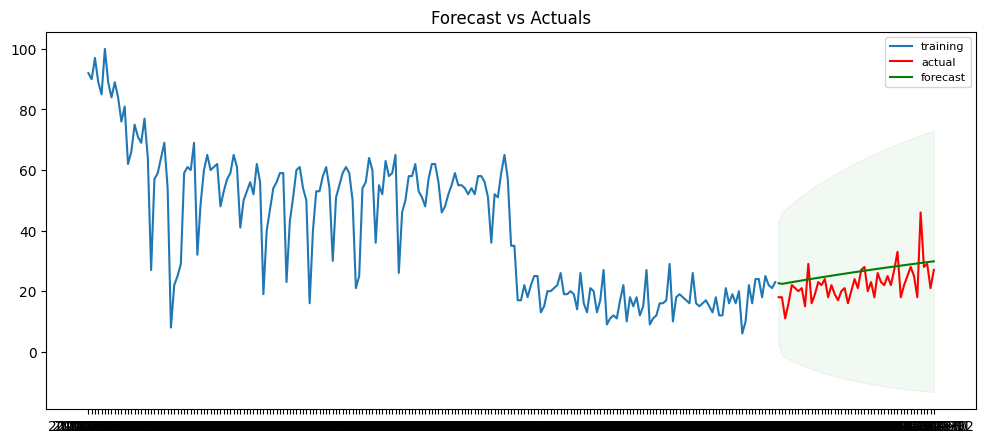

In [97]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train3, label='training')
plt.plot(test3, label='actual',color='r')
plt.plot(fc_series3, label='forecast',color='g')
plt.fill_between(lower_series3.index, lower_series3, upper_series3,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

In [98]:
training_set3=df_Australia['PercentOfBaseline']
training_set3=pd.DataFrame(training_set3)

In [99]:
# Feature Scaling
sc3 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled3 = sc3.fit_transform(training_set3)

In [100]:
# Creating a data structure with 52 timesteps and 1 output
X_train3 = []
y_train3 = []
for i in range(52, 257):
    X_train3.append(training_set_scaled3[i-52:i, 0])
    y_train3.append(training_set_scaled3[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

# Reshaping
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))

In [101]:
print(X_train3.shape)

(205, 52, 1)


In [102]:
# Initialising the RNN
model = Sequential()

In [103]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model.add(LSTM(64, return_sequences = True, input_shape = (X_train3.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2)),
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 52, 64)            16896     
                                                                 
 dropout_8 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 52, 50)            23000     
                                                                 
 dropout_9 (Dropout)         (None, 52, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 52, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 52, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)               

In [104]:
# Compiling the RNN
# Code here
model.compile(optimizer='adam', loss='mean_squared_error')

In [105]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model.fit(X_train3, y_train3, epochs=epoch, batch_size=batch_size)

Epoch 1/100
7/7 [==============================] - 8s 114ms/step - loss: 0.0558
Epoch 2/100
7/7 [==============================] - 1s 116ms/step - loss: 0.0234
Epoch 3/100
7/7 [==============================] - 1s 122ms/step - loss: 0.0170
Epoch 4/100
7/7 [==============================] - 1s 117ms/step - loss: 0.0153
Epoch 5/100
7/7 [==============================] - 1s 119ms/step - loss: 0.0145
Epoch 6/100
7/7 [==============================] - 1s 121ms/step - loss: 0.0143
Epoch 7/100
7/7 [==============================] - 1s 123ms/step - loss: 0.0145
Epoch 8/100
7/7 [==============================] - 1s 124ms/step - loss: 0.0124
Epoch 9/100
7/7 [==============================] - 1s 119ms/step - loss: 0.0136
Epoch 10/100
7/7 [==============================] - 1s 106ms/step - loss: 0.0128
Epoch 11/100
7/7 [==============================] - 1s 108ms/step - loss: 0.0131
Epoch 12/100
7/7 [==============================] - 1s 110ms/step - loss: 0.0139
Epoch 13/100
7/7 [===================

In [106]:
test_set3 = df_Australia['PercentOfBaseline']
test_set3=pd.DataFrame(test_set3)

In [107]:
test_set3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0+ KB


In [108]:
# Getting the predicted PercentOfBaseline
dataset_total3 = pd.concat((training_set3['PercentOfBaseline'], test_set3['PercentOfBaseline']), axis = 0)
inputs3 = dataset_total3[len(dataset_total3) - len(test_set3) - 52:].values
inputs3 = inputs3.reshape(-1,1)
inputs3 = sc.transform(inputs3)
X_test3 = []
for i in range(52, 309):
    X_test3.append(inputs3[i-52:i, 0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
predicted_PercentOfBaseline3 = model.predict(X_test3)
predicted_PercentOfBaseline3 = sc.inverse_transform(predicted_PercentOfBaseline3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [109]:
predicted_PercentOfBaseline3=pd.DataFrame(predicted_PercentOfBaseline3)
predicted_PercentOfBaseline3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


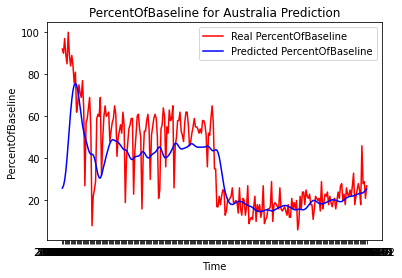

In [110]:
# Visualising the results
plt.plot(df_Australia, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline3, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for Australia Prediction')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

#DATASET CHILE

In [111]:
dataset_Chile = dataset[dataset['Country']=='Chile']
dataset_Chile.shape

(238, 6)

In [112]:
dataset_Chile.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
257,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,Chile
258,2020-04-28,Santiago International Airport,21,Santiago,Santiago Province,Chile
259,2020-05-12,Santiago International Airport,35,Santiago,Santiago Province,Chile
260,2020-05-21,Santiago International Airport,13,Santiago,Santiago Province,Chile
261,2020-10-19,Santiago International Airport,55,Santiago,Santiago Province,Chile


In [113]:
dataset_Chile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 257 to 494
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               238 non-null    object
 1   AirportName        238 non-null    object
 2   PercentOfBaseline  238 non-null    int64 
 3   City               238 non-null    object
 4   State              238 non-null    object
 5   Country            238 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.0+ KB


In [114]:
dataset_Chile.nunique()

Date                 238
AirportName            1
PercentOfBaseline     61
City                   1
State                  1
Country                1
dtype: int64

In [115]:
dataset_Chile = dataset_Chile.sort_values(by="Date")

In [116]:
dataset_Chile.set_index('Date',inplace=True)

In [117]:
dataset_Chile.head()

,AirportName,PercentOfBaseline,City,State,Country
Date,,,,,
2020-03-16,Santiago International Airport,96,Santiago,Santiago Province,Chile
2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,Chile
2020-03-18,Santiago International Airport,56,Santiago,Santiago Province,Chile
2020-03-19,Santiago International Airport,52,Santiago,Santiago Province,Chile
2020-03-20,Santiago International Airport,53,Santiago,Santiago Province,Chile


In [118]:
df_Chile = pd.DataFrame(dataset_Chile.groupby('Date',as_index=True)['PercentOfBaseline'].mean())

In [119]:
df_Chile.shape

(238, 1)

In [120]:
df_Chile.head()

,PercentOfBaseline
Date,
2020-03-16,96.0
2020-03-17,72.0
2020-03-18,56.0
2020-03-19,52.0
2020-03-20,53.0


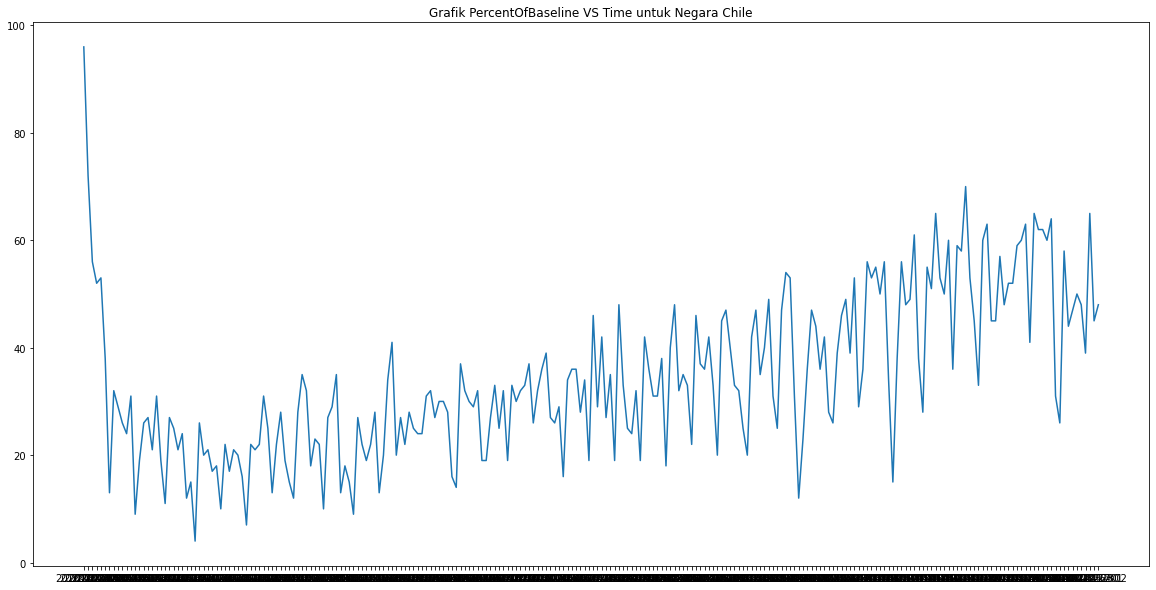

In [121]:
plt.figure(figsize=(20,10))
plt.plot(df_Chile)
plt.title("Grafik PercentOfBaseline VS Time untuk Negara Chile")
plt.show()

In [122]:
print('Results of Dickey-Fuller Test:')
test_Chile = adfuller(df_Chile['PercentOfBaseline'], autolag='AIC')
output_Chile = pd.Series(test_Chile[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test_Chile[4].items():
    output_Chile['Critical Value (%s)'%key] = value
print(output_Chile)

Results of Dickey-Fuller Test:
Test Statistic                  -0.831164
p-value                          0.809796
#Lags Used                      11.000000
Number of Observations Used    226.000000
Critical Value (1%)             -3.459620
Critical Value (5%)             -2.874415
Critical Value (10%)            -2.573632
dtype: float64


In [123]:
#define KPSS
print ('Results of KPSS Test:')
kpsstest4 = kpss(df_Chile['PercentOfBaseline'].dropna(), regression='c')
kpss_output4 = pd.Series(kpsstest4[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest4[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output4)

Results of KPSS Test:
Test Statistic     1.135992
p-value            0.010000
Lags Used         15.000000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


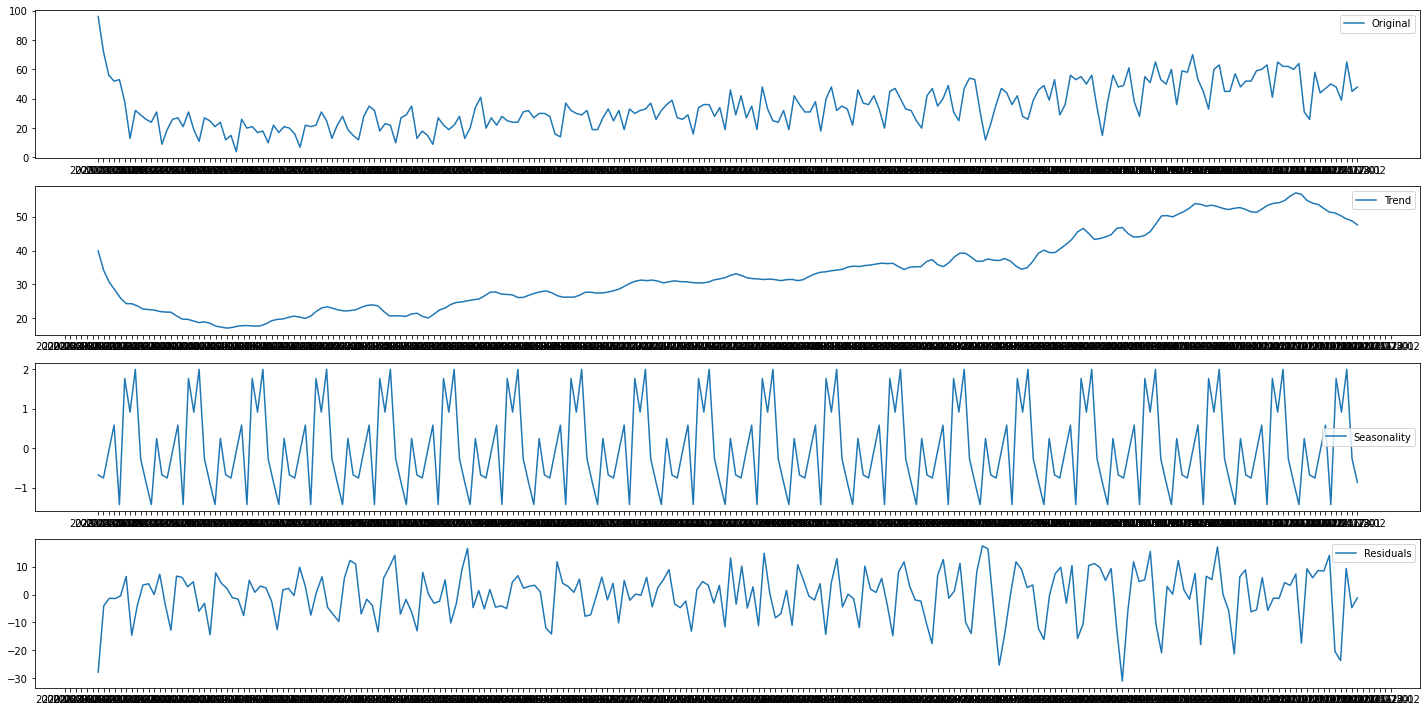

In [124]:
decomposition = seasonal_decompose(df_Chile.dropna(), model='additive', freq=12)

trend4 = decomposition.trend
seasonal4 = decomposition.seasonal
residual4 = decomposition.resid
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df_Chile['PercentOfBaseline'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend4, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal4,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual4, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

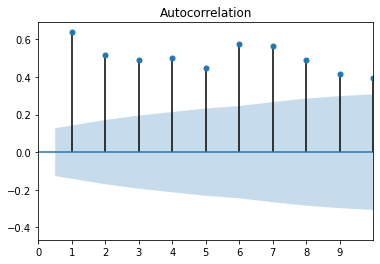

In [125]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df_Chile['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show() #q=2

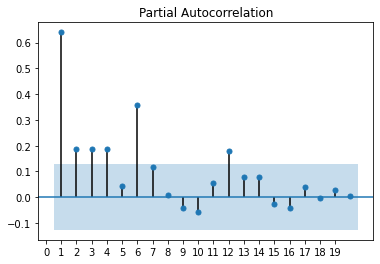

In [126]:
plot_pacf(df_Chile['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show() # p=1

In [127]:
# Create Training and Test
size4 = int(len(df_Chile['PercentOfBaseline'])*0.8)
train4 = df_Chile['PercentOfBaseline'].iloc[:size]
test4 = df_Chile['PercentOfBaseline'].iloc[size:]
# Build Model
model4 = ARMA(train4, order=(1,2))  
fitted4 = model4.fit() 
print(fitted4.summary())

# Forecast
fc4, se4, conf4 = fitted4.forecast(len(test4), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series4 = pd.Series(fc4, index=test4.index)
lower_series4 = pd.Series(conf4[:, 0], index=test4.index)
upper_series4 = pd.Series(conf4[:, 1], index=test4.index)

                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -780.612
Method:                       css-mle   S.D. of innovations             10.101
Date:                Tue, 05 Jul 2022   AIC                           1571.225
Time:                        02:40:12   BIC                           1587.936
Sample:                             0   HQIC                          1577.981
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      39.5349      9.269      4.265      0.000      21.367      57.703
ar.L1.PercentOfBaseline     0.9805      0.018     55.437      0.000       0.946       1.015


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


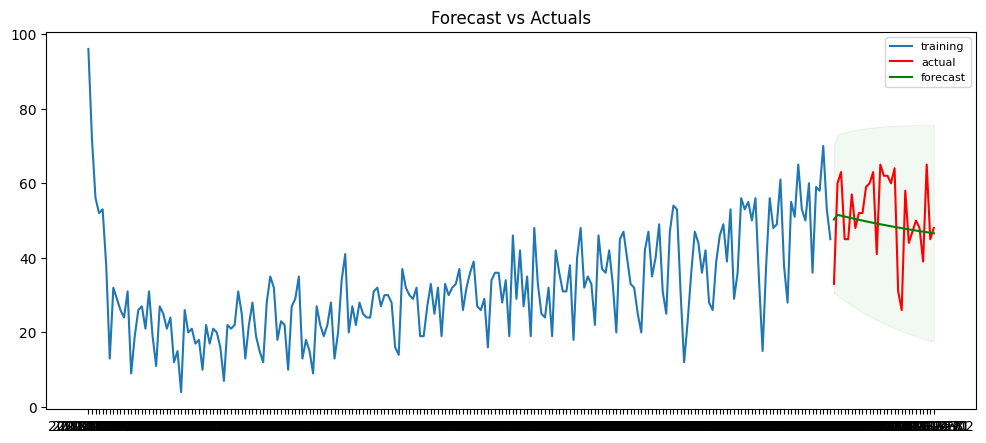

In [128]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train4, label='training')
plt.plot(test4, label='actual',color='r')
plt.plot(fc_series4, label='forecast',color='g')
plt.fill_between(lower_series4.index, lower_series4, upper_series4,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

In [129]:
training_set4=df_Chile['PercentOfBaseline']
training_set4=pd.DataFrame(training_set4)

In [145]:
# Feature Scaling
sc4 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled4 = sc4.fit_transform(training_set4)

In [146]:
# Creating a data structure with 48 timesteps and 1 output
X_train4 = []
y_train4 = []
for i in range(47, 238):
    X_train4.append(training_set_scaled4[i-47:i, 0])
    y_train4.append(training_set_scaled4[i, 0])
X_train4, y_train4 = np.array(X_train4), np.array(y_train4)

# Reshaping
X_train4 = np.reshape(X_train4, (X_train4.shape[0], X_train4.shape[1], 1))

In [147]:
print(X_train4.shape)

(191, 47, 1)


In [148]:
# Initialising the RNN
model = Sequential()

In [149]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model.add(LSTM(64, return_sequences = True, input_shape = (X_train4.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2)),
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 47, 64)            16896     
                                                                 
 dropout_16 (Dropout)        (None, 47, 64)            0         
                                                                 
 lstm_17 (LSTM)              (None, 47, 50)            23000     
                                                                 
 dropout_17 (Dropout)        (None, 47, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 47, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 47, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 50)               

In [150]:
# Compiling the RNN
# Code here
model.compile(optimizer='adam', loss='mean_squared_error')

In [151]:
# Fitting the RNN to the Training set
epoch = 100 
batch_size = 32
model.fit(X_train4, y_train4, epochs=epoch, batch_size=batch_size)

Epoch 1/100
6/6 [==============================] - 8s 101ms/step - loss: 0.0745
Epoch 2/100
6/6 [==============================] - 1s 106ms/step - loss: 0.0223
Epoch 3/100
6/6 [==============================] - 1s 112ms/step - loss: 0.0161
Epoch 4/100
6/6 [==============================] - 1s 114ms/step - loss: 0.0155
Epoch 5/100
6/6 [==============================] - 1s 109ms/step - loss: 0.0140
Epoch 6/100
6/6 [==============================] - 1s 113ms/step - loss: 0.0137
Epoch 7/100
6/6 [==============================] - 1s 112ms/step - loss: 0.0128
Epoch 8/100
6/6 [==============================] - 1s 111ms/step - loss: 0.0122
Epoch 9/100
6/6 [==============================] - 1s 117ms/step - loss: 0.0120
Epoch 10/100
6/6 [==============================] - 1s 118ms/step - loss: 0.0132
Epoch 11/100
6/6 [==============================] - 1s 113ms/step - loss: 0.0118
Epoch 12/100
6/6 [==============================] - 1s 118ms/step - loss: 0.0132
Epoch 13/100
6/6 [===================

In [152]:
test_set4 = df_Chile['PercentOfBaseline']
test_set4=pd.DataFrame(test_set4)

In [153]:
test_set4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7+ KB


In [154]:
# Getting the predicted PercentOfBaseline
dataset_total4 = pd.concat((training_set4['PercentOfBaseline'], test_set4['PercentOfBaseline']), axis = 0)
inputs4 = dataset_total4[len(dataset_total4) - len(test_set4) - 47:].values
inputs4 = inputs4.reshape(-1,1)
inputs4 = sc.transform(inputs4)
X_test4 = []
for i in range(47, 285):
    X_test4.append(inputs4[i-47:i, 0])
X_test4 = np.array(X_test4)
X_test4 = np.reshape(X_test4, (X_test4.shape[0], X_test4.shape[1], 1))
predicted_PercentOfBaseline4 = model.predict(X_test4)
predicted_PercentOfBaseline4 = sc.inverse_transform(predicted_PercentOfBaseline4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [155]:
predicted_PercentOfBaseline4=pd.DataFrame(predicted_PercentOfBaseline4)
predicted_PercentOfBaseline4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


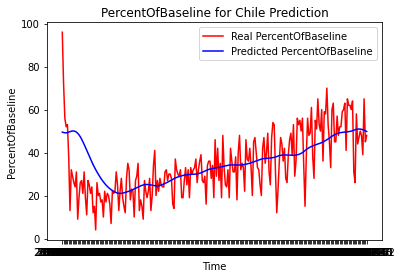

In [156]:
# Visualising the results
plt.plot(df_Chile, color = 'red', label = 'Real PercentOfBaseline')
plt.plot(predicted_PercentOfBaseline4, color = 'blue', label = 'Predicted PercentOfBaseline')
plt.title('PercentOfBaseline for Chile Prediction')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()